In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2]:
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
display(df.describe())

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


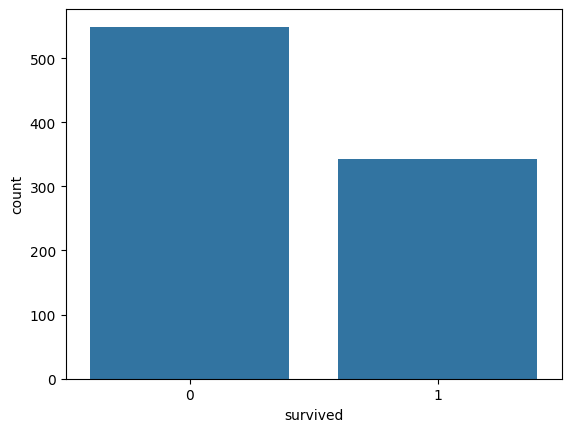

In [ ]:
sns.countplot(df, x='survived')
plt.show()

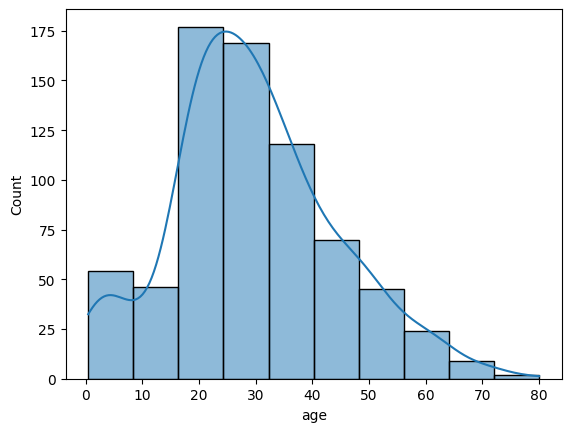

In [16]:
sns.histplot(df, x='age', bins=10, kde=True)
plt.show()

In [ ]:
df.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

Data set isn't balanced

In [ ]:
nulls = df.isnull().sum()
display(nulls[nulls > 0])

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [49]:
for col in df.columns:
    if df[col].dtype in ('object', 'category'):
      df[col] = df[col].fillna(df[col].mode()[0])
    else:
      df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
X = df.drop('survived', axis=1)._get_numeric_data()
y = df['survived']
display(y.value_counts()) # before

ros = RandomOverSampler(random_state=727)
X_res, y_res = ros.fit_resample(X, y)

y_res.value_counts() # after

survived
0    549
1    342
Name: count, dtype: int64

survived
0    549
1    549
Name: count, dtype: int64

In [64]:
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5, step=1)
rfe.fit(X, y)

selected_cols = X.columns[rfe.support_.tolist()]

selected_cols

Index(['pclass', 'sibsp', 'parch', 'adult_male', 'alone'], dtype='object')

In [ ]:
non_numeric_cols = df.select_dtypes(include=["object", "category"]).columns

df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

df_encoded.head()

# one hot encoding assigns N boolean columns to N different categories
# whereas dummy encoding assigns N-1 boolean columns to N different categories. The last one can be found out due to how
# the degree of freedom works

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [76]:
# first
df_nodup1 = df.drop_duplicates()

# second
df_nodup2 = df.drop_duplicates(keep='last')